In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
2 + 2

4

In [4]:
2 ** 5

32

In [5]:
'hi mom'

'hi mom'

In [6]:
2 + 3
4 + 5

9

# Coin flipping

In [2]:
sides = ['Heads', 'Tails']

In [3]:
np.random.choice(sides)

'Tails'

In [4]:
np.random.choice(sides, 100)

array(['Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails',
       'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails',
       'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails',
       'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails',
       'Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Tails',
       'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Tai

In [5]:
np.random.choice(sides, 100) == 'Heads'

array([ True, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False, False,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False,  True,  True,  True,  True,  True], dtype=bool)

In [6]:
np.count_nonzero(np.random.choice(sides, 100) == 'Heads')

50

In [7]:
counts = make_array()
for i in range(10000):
    counts = np.append(counts, np.count_nonzero(np.random.choice(sides, 100) == 'Heads'))

In [8]:
t = Table().with_column('Count', counts)
t

Count
41
46
55
60
46
56
60
46
51
56


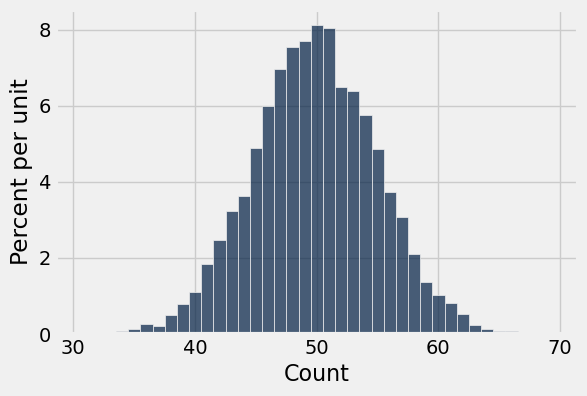

In [9]:
t.hist(bins=np.arange(30.5, 70.5, 1))

In [10]:
counts > 60

array([False, False, False, ..., False, False, False], dtype=bool)

In [11]:
np.count_nonzero(counts > 60) / 10000

0.0181

In [12]:
percentile(50, counts) # 50% of the values are <= this

50.0

In [14]:
percentile(99, counts) # 99% of the values are <= this

61.0

In [13]:
percentile(2.5, counts), percentile(97.5, counts)

(40.0, 60.0)

In [ ]:
# ^ A 95% *confidence interval*
# If we run this experiment 100 times, 95 of the times we'd see a value in that range
# Something outside of that range would be in the other 5%, and that'd be *statistically significant*

# Sons' Heights

In [70]:
sons_heights = Table.read_table('data/sons_heights.csv').select('father', 'son')
sons_heights

father,son
78.5,73.2
75.5,73.5
75,71
75,70.5
75,72
74,76.5
74,74
73,71
73,68
73,71


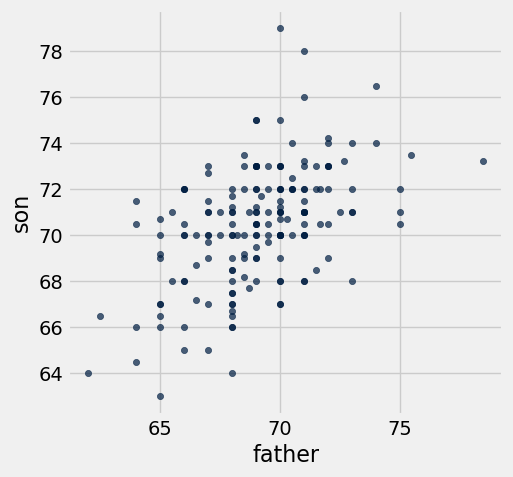

In [71]:
sons_heights.scatter('father', 'son')

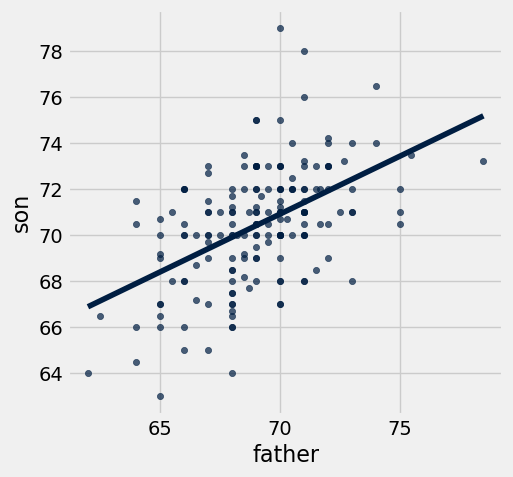

In [72]:
sons_heights.scatter('father', 'son', fit_line=True)

In [73]:
def standard_units(arr):
    """ Converts an array to standard units (a.k.a. z-scores) """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

In [74]:
correlation(sons_heights, 'father', 'son')

0.50072475554943707

In [75]:
m = slope(sons_heights, 'father', 'son')
b = intercept(sons_heights, 'father', 'son')
m, b

(0.50279044119141691, 35.712490894054319)

In [76]:
m*70 + b

70.907821777453506

In [77]:
m*72.5 + b

72.164797880432047

# Cereal

In [8]:
cereal = Table.read_table('data/cereal.csv')
cereal

name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.403
100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.9837
All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.4255
All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.7049
Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.3848
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.5095
Apple Jacks,K,C,110,2,0,125,1,11,14,30,25,2,1,1,33.1741
Basic 4,G,C,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.0386
Bran Chex,R,C,90,2,1,200,4,15,6,125,25,1,1,0.67,49.1203
Bran Flakes,P,C,90,3,0,210,5,13,5,190,25,3,1,0.67,53.3138


In [9]:
cereal.select('shelf', 'sugars').group('shelf', np.average)

shelf,sugars average
1,4.8
2,9.61905
3,6.52778


In [11]:
cereal.select('shelf', 'sugars').with_column(
    'Shuffled Shelf', cereal.sample(with_replacement=False).column('shelf')
)

shelf,sugars,Shuffled Shelf
3,6,2
3,8,3
3,5,3
3,0,1
3,8,3
1,10,3
2,14,3
3,8,1
1,6,2
3,5,3


In [12]:
def one_sample_average():
    return cereal.with_column(
        'Shuffled Label', cereal.sample(with_replacement=False).column('shelf')
    ).where('Shuffled Label', 2).column('sugars').mean()

simulations = 10000
sample_averages = make_array()
for i in np.arange(simulations):
    sample_averages = np.append(sample_averages, one_sample_average())

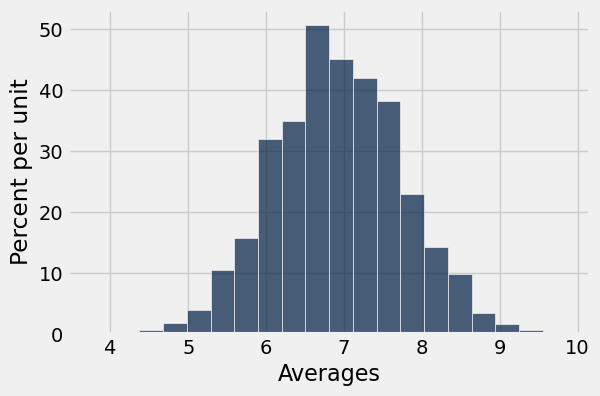

In [13]:
Table().with_column('Averages', sample_averages).hist(0, bins=20)

In [14]:
np.count_nonzero(sample_averages >= 9.61905) / len(sample_averages)

0.0004

In [ ]:
# Conclusion: we *reject* the null hypothesis!

# Clue

In [21]:
suspects = ['Scarlett', 'Mustard', 'White', 'Green', 'Peacock', 'Plum']
weapons = ['candlestick', 'knife', 'lead pipe', 'rope', 'revolver', 'wrench']
rooms = ['hall', 'study', 'ballroom', 'billiard room', 'dining room', 'kitchen', 'lounge', 'conservatory', 'library']

options = Table(['Suspect', 'Weapon', 'Room'])
for s in suspects:
    for w in weapons:
        for r in rooms:
            options.append([s, w, r])

options

Suspect,Weapon,Room
Scarlett,candlestick,hall
Scarlett,candlestick,study
Scarlett,candlestick,ballroom
Scarlett,candlestick,billiard room
Scarlett,candlestick,dining room
Scarlett,candlestick,kitchen
Scarlett,candlestick,lounge
Scarlett,candlestick,conservatory
Scarlett,candlestick,library
Scarlett,knife,hall


# Titanic

In [2]:
titanic = Table.read_table('data/titanic.csv')
titanic

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


In [8]:
titanic.where('Survived', 1)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16,nan,S
18,1,2,"Williams, Mr. Charles Eugene",male,nan,0,0,244373,13,nan,S
20,1,3,"Masselmani, Mrs. Fatima",female,nan,0,0,2649,7.225,nan,C


In [9]:
survivor_sample = titanic.where('Survived', 1).sample(100, with_replacement=False)
survivor_sample

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,nan,0,0,65306,8.1125,nan,S
661,1,1,"Frauenthal, Dr. Henry William",male,50,2,0,PC 17611,133.65,nan,S
693,1,3,"Lam, Mr. Ali",male,nan,0,0,1601,56.4958,nan,S
559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39,1,1,110413,79.65,E67,S
408,1,2,"Richards, Master. William Rowe",male,3,1,1,29106,18.75,nan,S
331,1,3,"McCoy, Miss. Agnes",female,nan,2,0,367226,23.25,nan,Q
339,1,3,"Dahl, Mr. Karl Edwart",male,45,0,0,7598,8.05,nan,S
400,1,2,"Trout, Mrs. William H (Jessie L)",female,28,0,0,240929,12.65,nan,S
26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)",female,38,1,5,347077,31.3875,nan,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16,nan,S


In [10]:
survivor_sample.group('Sex')

Sex,count
female,71
male,29


In [57]:
observed_female_survivor_count = 71

In [16]:
random_100 = sample_proportions(100, [0.5, 0.5]) * 100
random_100

array([ 47.,  53.])

In [17]:
random_100.item(1)

53.0

In [18]:
def one_sample_survivor_count():
    random_100 = sample_proportions(100, [0.5, 0.5]) * 100
    return random_100.item(1)

In [20]:
counts = make_array()
for i in range(1000):
    counts = np.append(counts, one_sample_survivor_count())

In [25]:
counts

array([ 45.,  51.,  51.,  50.,  46.,  44.,  46.,  44.,  46.,  45.,  41.,
        55.,  55.,  54.,  53.,  55.,  49.,  47.,  56.,  44.,  55.,  52.,
        48.,  47.,  51.,  42.,  48.,  53.,  49.,  49.,  50.,  52.,  51.,
        55.,  51.,  52.,  52.,  52.,  63.,  44.,  52.,  54.,  62.,  56.,
        51.,  44.,  45.,  44.,  53.,  56.,  39.,  59.,  49.,  54.,  53.,
        53.,  50.,  50.,  50.,  53.,  51.,  41.,  48.,  61.,  54.,  51.,
        37.,  46.,  54.,  45.,  52.,  47.,  49.,  51.,  54.,  58.,  45.,
        59.,  53.,  41.,  52.,  51.,  46.,  44.,  55.,  57.,  59.,  51.,
        50.,  52.,  48.,  39.,  55.,  55.,  52.,  51.,  55.,  47.,  49.,
        49.,  49.,  51.,  57.,  43.,  60.,  47.,  49.,  52.,  45.,  46.,
        44.,  47.,  44.,  49.,  57.,  46.,  47.,  49.,  53.,  49.,  53.,
        37.,  46.,  52.,  55.,  52.,  50.,  49.,  47.,  58.,  52.,  57.,
        48.,  44.,  51.,  46.,  56.,  51.,  53.,  52.,  48.,  60.,  54.,
        54.,  51.,  46.,  56.,  47.,  55.,  46.,  5

In [27]:
counts >= observed_female_survivor_count

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [28]:
np.count_nonzero(counts >= observed_female_survivor_count)

0

In [29]:
# 0% chance this was due to randomness! Women were more likely than men to be survive!

In [30]:
# We can of course compare to the actual totals, since we know now about everyone!

In [32]:
titanic.where('Survived', 1).group('Sex')

Sex,count
female,233
male,109


In [33]:
233 / (233 + 109)

0.6812865497076024

---

In [39]:
lifeboat_knowledge = titanic.sample(100, with_replacement=False)
lifeboat_knowledge.pivot('Sex', 'Survived')

Survived,female,male
0,12,50
1,30,8


In [40]:
sample_female_survivor_ratio = 30 / (30 + 12)
sample_female_survivor_ratio

0.7142857142857143

In [44]:
female_column = lifeboat_knowledge.pivot('Sex', 'Survived').column(1)
female_column.item(1) / sum(female_column)

0.7142857142857143

In [41]:
lifeboat_knowledge.sample(100)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,1,3,"McCormack, Mr. Thomas Joseph",male,nan,0,0,367228,7.75,nan,Q
121,0,2,"Hickman, Mr. Stanley George",male,21,2,0,S.O.C. 14879,73.5,nan,S
376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,nan,1,0,PC 17604,82.1708,nan,C
267,0,3,"Panula, Mr. Ernesti Arvid",male,16,4,1,3101295,39.6875,nan,S
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S
705,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,nan,S
823,0,1,"Reuchlin, Jonkheer. John George",male,38,0,0,19972,0,nan,S
702,1,1,"Silverthorne, Mr. Spencer Victor",male,35,0,0,PC 17475,26.2875,E24,S
542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9,4,2,347082,31.275,nan,S
343,0,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13,nan,S


In [49]:
def one_bootstrap_ratio():
    new_knowledge = lifeboat_knowledge.sample(100)
    female_column = new_knowledge.pivot('Sex', 'Survived').column(1)
    return female_column.item(1) / sum(female_column)

In [50]:
ratios = make_array()
for i in range(1000):
    ratios  = np.append(ratios, one_bootstrap_ratio())

In [51]:
Table().with_column('ratio', ratios).sort('ratio')

ratio
0.482759
0.483871
0.487805
0.511111
0.511628
0.514286
0.516129
0.522727
0.527273
0.531915


In [52]:
Table().with_column('ratio', ratios).sort('ratio', descending=True)

ratio
0.947368
0.903226
0.9
0.894737
0.886364
0.885714
0.882353
0.880952
0.880952
0.878049


In [54]:
percentile(2.5, ratios), percentile(97.5, ratios)

(0.5714285714285714, 0.84615384615384615)

In [55]:
# if we calculated this interval 100 times, 95% of the time it'd contain the true female survival ratio

In [56]:
female_column = titanic.pivot('Sex', 'Survived').column(1)
female_column.item(1) / sum(female_column)

0.7420382165605095